<a href="https://colab.research.google.com/github/lahmuller/CS_Notes/blob/main/Notes/deep_learning_with_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# numpy深度学习

100


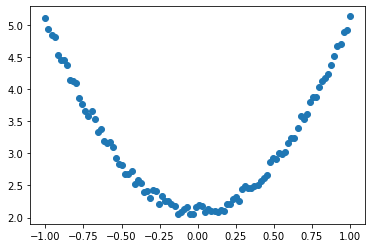

In [6]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
np.random.seed(100)
x=np.linspace(-1,1,100).reshape(100,1)
print(x.size)
y=3*np.power(x,2)+2+0.2*np.random.rand(x.size).reshape(100,1)
plt.scatter(x,y)
plt.show()

In [7]:
w1=np.random.rand(1,1)
b1=np.random.rand(1,1)
lr=0.001
for i in range(800):
  y_pred=np.power(x,2)*w1+b1
  loss=0.5*(y_pred-y)**2
  loss=loss.sum()
  #grad
  grad_w=np.sum((y_pred-y)*np.power(x,2))
  grad_b=np.sum(y_pred-y)
  w1-=lr*grad_w
  b1-=lr*grad_b

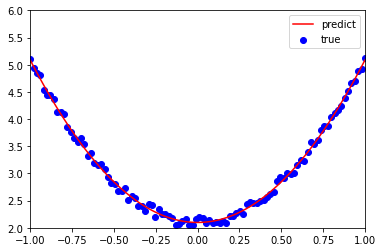

[[2.98927619]] [[2.09818307]]


In [8]:
plt.plot(x,y_pred,'r-',label='predict')
plt.scatter(x,y,color='blue',marker='o',label='true')
plt.xlim(-1,1)
plt.ylim(2,6)
plt.legend()
plt.show()
print(w1,b1)



---



# pytorch深度学习

In [13]:
import torch as t
%matplotlib inline
from matplotlib import pyplot as plt

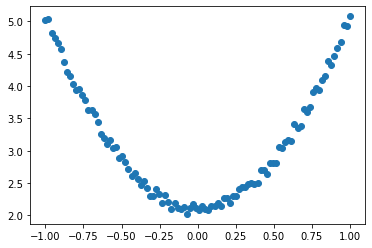

In [14]:
t.manual_seed(100)
dtype=t.float
x=t.unsqueeze(t.linspace(-1,1,100),dim=1)
y=3*x.pow(2)+2+0.2*t.rand(x.size())
plt.scatter(x.numpy(),y.numpy())
plt.show()

In [17]:
lr=0.001
w=t.rand(1,1,dtype=dtype,requires_grad=True)
b=t.rand(1,1,dtype=dtype,requires_grad=True)
for ii in range(800):
  y_pred=x.pow(2)*w+b
  loss=0.5*(y_pred-y)**2
  loss=loss.sum()
  #autograd
  loss.backward()
  #手动更新参数，需要用torch.no_grad()切断上下文自动求导的计算,此时不会track 对参数的计算（https://blog.csdn.net/weixin_46559271/article/details/105658654）
  with t.no_grad():
    w-=lr*w.grad
    b-=lr*b.grad
    #清零
    w.grad.data.zero_()
    b.grad.data.zero_()

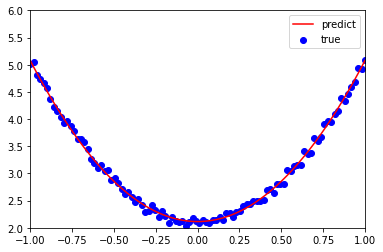

tensor([[2.9639]], requires_grad=True) tensor([[2.1149]], requires_grad=True)


In [19]:
plt.plot(x.numpy(),y_pred.detach().numpy(),'r-',label='predict')
plt.scatter(x.numpy(),y.numpy(),color='blue',marker='o',label='true')
plt.xlim(-1,1)
plt.ylim(2,6)
plt.legend()
plt.show()
print(w,b)